In [2]:
# import libraries needed
import pandas as pd
from collections import OrderedDict
from sklearn.model_selection import train_test_split
import datetime

import random
random.seed(42)
import glob

## data load

In [5]:
filepaths = glob.glob("/home/ravi/UCF Dropbox/KAMALAKKANNAN RAVI/guyonDesktop/DATA_AutomatedHarmDetection/allChatsReplies/*.json")

In [6]:
all_replies_count = 0
for filepath in filepaths:
    data = pd.read_json(filepath, orient='records')
    # print(data.shape, filepath.split('/')[-1])
    print(data.shape[0])
    # print(str.split(filepath.split('/')[-1], '_')[0])
    all_replies_count+=data.shape[0]
print("all_replies_count:{}".format(all_replies_count))

39
649
185239
322488
13309
15819
28134
165684
68325
297502
104499
23967
153517
all_replies_count:1379171


## Sample 1000 Replies

In [37]:
InfoWars = pd.read_json('/home/ravi/DATA_AutomatedHarmDetection/allChatsReplies/InfoWars.com_Date_Replies.json', orient='records')
AlexJones = pd.read_json('/home/ravi/DATA_AutomatedHarmDetection/allChatsReplies/AlexJones_Date_Replies.json', orient='records')

In [38]:
start_date= 1608008400 # Dec 15, 2020
end_date= 1613451599 # Feb 15, 2021
InfoWarsDF = InfoWars.loc[(InfoWars['date_unixtime'] >= start_date) & (InfoWars['date_unixtime'] <= end_date)]
AlexJonesDF = AlexJones.loc[(AlexJones['date_unixtime'] >= start_date) & (AlexJones['date_unixtime'] <= end_date)]
print(InfoWarsDF.shape, AlexJonesDF.shape)

(3087, 2) (792, 2)


In [39]:
def stratified_sample_df(df, col, n_samples):
    n = min(n_samples, df[col].value_counts().min())
    df_ = df.groupby(col).apply(lambda x: x.sample(n))
    df_.index = df_.index.droplevel(0)
    return df_

In [40]:
AlexJonesDF500 = AlexJonesDF.sample(n=500, weights='date_unixtime', random_state=42).reset_index(drop=True)
InfoWarsDF500 =  InfoWarsDF.sample(n=500, weights='date_unixtime', random_state=42).reset_index(drop=True)

In [41]:
AlexJonesDF500.sort_values(by=['date_unixtime'])

,date_unixtime,reply
70,1611542658,"As an illustration of the futility of ""protest..."
120,1611543197,re: Gates dimming the Sun\nDon't you think it'...
189,1611545463,Lin Wood has lost all channel of speech except...
323,1611545806,goo
355,1611545810,d
...,...,...
41,1613422763,Wil it transmit that far?
232,1613423253,Ain't to far of a fetch for him to turn that h...
401,1613443139,Sitting in Kemah w power....surrounded by ppl ...
359,1613443699,Leading a Movement of Repentance: The last thi...


In [42]:
InfoWarsDF500.sort_values(by=['date_unixtime'])

,date_unixtime,reply
204,1611550376,Planned.
126,1611550589,Acosta and CNN are the real existential threat...
71,1611550644,Dominion
201,1611551822,Paul is on top of things as always. His point ...
447,1611552019,HAHAHAHAHA BILL HICKS YOU STAR
...,...,...
491,1613423254,Wrong. It's Trump and the military who will sa...
253,1613428375,Jerkwad McConnell RINO... I'm done with the GO...
371,1613428548,Mitch is no longer an electable candidate. I c...
451,1613431022,The entire GOP is commie trash. If you don't g...


In [43]:
Sample1000=pd.concat([AlexJonesDF500, InfoWarsDF500], axis=0)

In [44]:
Sample1000.sort_values(by=['date_unixtime'])

,date_unixtime,reply
70,1611542658,"As an illustration of the futility of ""protest..."
120,1611543197,re: Gates dimming the Sun\nDon't you think it'...
189,1611545463,Lin Wood has lost all channel of speech except...
323,1611545806,goo
355,1611545810,d
...,...,...
451,1613431022,The entire GOP is commie trash. If you don't g...
220,1613435033,It was a supportive rally. Not an insurrection...
401,1613443139,Sitting in Kemah w power....surrounded by ppl ...
359,1613443699,Leading a Movement of Repentance: The last thi...


In [45]:
Sample1000['label']=""

In [47]:
Sample1000.to_json('/home/ravi/DATA_AutomatedHarmDetection/Sample1000Data.json', orient='records')

## annotated Data

In [2]:
anno=pd.read_json("/home/ravi/DATA_AutomatedHarmDetection/Sample1000DataByRavi.json", orient='records')

In [10]:
anno.label[0][0]

'No harm'

In [13]:
anno['label']=anno.label.str.join(',')

In [14]:
anno

,id,data,label,date_unixtime
0,293323,Isaiah 2:20,No harm,1612205510
1,293324,Alex you are a voice crying in the Wilderness....,No harm,1613369475
2,293325,"Due to being trafficked as a child, the masks ...",No harm,1612923731
3,293326,Do you know anything about and military proced...,No harm,1613348593
4,293327,👍 ... Of course he didn't. Anyone with brain...,No harm,1611699453
...,...,...,...,...
995,294318,Infowars IS DOWN!!! EVEN THEIR CONTACT NUMBERS...,No harm,1613398960
996,294319,Gates is probably really pleased,No harm,1613066945
997,294320,Open carry States are very polite and civilized.,No harm,1613074911
998,294321,When calling out a crime considered a crime we...,No harm,1612308519


In [15]:
anno.label.unique()

array(['No harm', 'Ambiguous', 'Judicial harm', 'Non judicial'],
      dtype=object)

In [17]:
anno=anno.replace('Ambiguous','No harm')

In [18]:
anno.label.unique()

array(['No harm', 'Judicial harm', 'Non judicial'], dtype=object)

In [19]:
anno=anno.replace('Judicial harm','Harm')
anno=anno.replace('Non judicial','Harm')

In [23]:
anno.label.value_counts()

No harm    965
Harm        35
Name: label, dtype: int64

In [24]:
anno=anno.replace('No harm',0)
anno=anno.replace('Harm',1)

In [26]:
anno.to_json("/home/ravi/DATA_AutomatedHarmDetection/sample1000class2.json", orient='records')

## split train, test

In [30]:
AllClassesDF=pd.read_json("/home/ravi/DATA_AutomatedHarmDetection/sample1000class2.json", orient='records')

In [31]:
AllClassesDF.head(1)

,id,data,label,date_unixtime
0,293323,Isaiah 2:20,0,1612205510


In [33]:
AllClassesDF['date']=pd.to_datetime(AllClassesDF['date_unixtime'], unit='s')
AllClassesDF['date']=pd.to_datetime(AllClassesDF['date']).dt.date

In [35]:
alltrain, test = train_test_split(AllClassesDF, test_size=0.2, random_state=42, stratify=AllClassesDF[['label']])

In [37]:
print(AllClassesDF.shape)
print(alltrain.shape)
print(test.shape)

(1000, 5)
(800, 5)
(200, 5)


<AxesSubplot:>

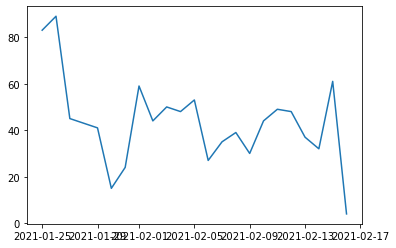

In [34]:
AllClassesDF.date.value_counts().sort_values().plot(kind = 'line')

<AxesSubplot:>

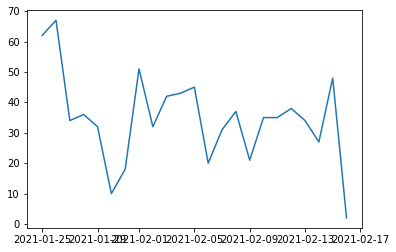

In [38]:
alltrain.date.value_counts().sort_values().plot(kind = 'line')

<AxesSubplot:>

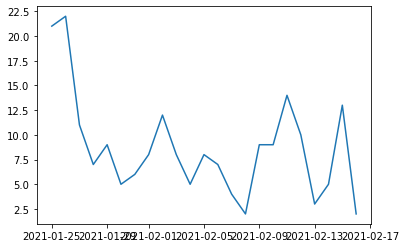

In [39]:
test.date.value_counts().sort_values().plot(kind = 'line')

In [40]:
# AllClassesDF
print("writing to json")
AllClassesDF.to_json("/home/ravi/DATA_AutomatedHarmDetection/DataModelsResults/Data/AllClassesDF.json", orient="records", default_handler = str)

writing to json


In [41]:
# alltrain
print("writing to json")
alltrain.to_json("/home/ravi/DATA_AutomatedHarmDetection/DataModelsResults/Data/alltrainDF.json", orient="records", default_handler = str)

writing to json


In [42]:
# test
print("writing to json")
test.to_json("/home/ravi/DATA_AutomatedHarmDetection/DataModelsResults/Data/testDF.json", orient="records", default_handler = str)

writing to json


In [43]:
test.label.value_counts()

0    193
1      7
Name: label, dtype: int64